<a href="https://colab.research.google.com/github/etckanikama/Get-Start-Machine-Learning-using-Python/blob/main/chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=16e890a571c656b3a1203ca6c8513956157fff9e177f384cdc7e4287064c7fe4
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


[1 0 1 0 1 0 0]
0.8571428571428571
[ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
1
3
9


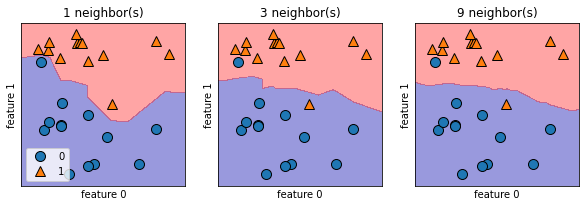

In [17]:
#2章：教師あり学習
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# k-NN: k-最近傍法
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #k=3
# 次に訓練セットを用いてクラス分類
clf.fit(X_train, y_train)
print(clf.predict(X_test)) 
# 汎化性能
print(clf.score(X_test, y_test))
# print(X) #二つの特徴量を持つ
print(X[:,0]) #特徴量の内一つめ，X[:,1]が二つ目
print(y)


fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
  print(n_neighbors)
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5, ax =ax , alpha=0.4) #第一引数に分類モデル，第二引数に元データを置くと境界線を引いてくれる
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) #特徴量一つ目，特徴量二つ目，正解ラベル→
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

range(1, 11)
1
2
3
4
5
6
7
8
9
10


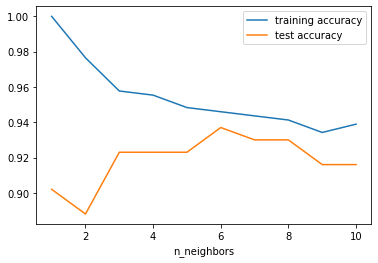

In [22]:
from sklearn import neighbors
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neighbor 1~10まで試す：kの数
neighbors_settings = range(1,11)
print(neighbors_settings)

for n_neighbors in neighbors_settings:
  print(n_neighbors)
  # モデルを構築
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 訓練セット精度を記録
  training_accuracy.append(clf.score(X_train, y_train))
  # 汎化性能を記録
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
# k:6くらいが精度もよくて汎化性能も高いと言える
# kが少ない→モデルが複雑であり，表現能力が高いが汎化性能が低くなりがち
# kが多いと→モデルがシンプルになって，性能がひくい

test set pkrediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set R^2: 0.83
w[0]: 0.393906  b: -0.031804


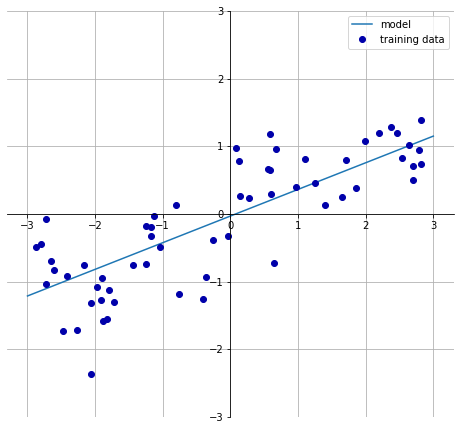

In [28]:
# k-最近傍法ではなく→k-近傍"回帰"(regressor:回帰)
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
# waveデータセットを訓練とテストで分ける
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# 3つの近傍点を考慮してモデルのインスタンス化
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("test set pkrediction: \n{}".format(reg.predict(X_test))) #テストに対する精度
print("test set R^2: {:.2f}".format(reg.score(X_test,y_test)))
# 線形回帰：多数の特徴量を持っているときに有効
mglearn.plots.plot_linear_regression_wave()

In [30]:
# 線形回帰
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
# 重み（係数）：coefficient(coef_属性), 切片:intercept(intercept_属性)
print("lr.coef:{}".format(lr.coef_))
# print("")




lr.coef:[0.39390555]


In [34]:
# p49:線形回帰：真の値と予測の回帰ターゲットが最小になるようにwとbを決める
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("線形回帰")
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
# 訓練スコアと検証スコアにずれが大きい→過剰適合（過学習）が起きている可能性，訓練データにのみ対応した結果→要するに単純すぎる一次方程式じゃ表現しきれないよねって感じ
# だからパラメータをもっといじれるようにする→正則化項を加えることに対応→これはリッジ回帰

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("リッジ回帰")
print(ridge.score(X_train,y_train))
print(ridge.score(X_test, y_test))
# 線形回帰で過剰適応していた差を抑えた．スコアが高いと言える．
# ロジスティック回帰：回帰ではなく分類アルゴリズム



線形回帰
0.9520519609032727
0.607472195966557
リッジ回帰
0.8857966585170941
0.7527683481744751


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


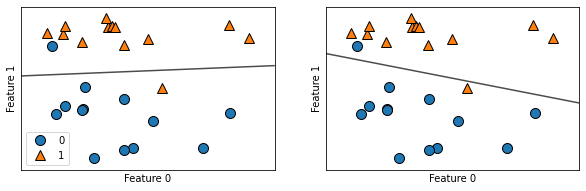

In [37]:
# ロジスティック回帰：回帰アルゴリズムではなく分類アルゴリズムらしい
# サポートベクトルマシン:決定境界
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge() #データセットの準備
fig,axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X,fill= False, eps=0.5, ax = ax, alpha=0.7)
  mglearn.discrete_scatter(X[:,0],X[:,1],y, ax = ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()



In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰のもう少し実装：がんのやつ
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# max_iterのデフォルトは1000
logreg = LogisticRegression(max_iter=2000).fit(X_train, y_train)
print(logreg.score(X_train, y_train))



0.9577464788732394


In [42]:
# 2.3.3.6:線形モデルによる多クラス分類

In [48]:
# ナイーブベイズクラス分類器
x = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

# 非ゼロ要素をカウントする方法
counts ={}
for label in np.unique(y):
  print(label) #0 ,1のふたつ
  # それぞれの特徴量ごとに非ゼロの数を加算する
  counts[label] = x[y==label].sum(axis=0) #axis=0行方向に足し合わす
print(counts)
  


0
1
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
